# Análise Final La Msion Brasil

## Bibliotecas

In [71]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.decomposition import PCA
import pingouin as pg
# from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scikit_posthocs as sp

In [2]:
# Define que o pandas não deve limitar o número de colunas exibidas
pd.set_option("display.max_columns", None)

# BÔNUS: Você também pode fazer o mesmo para as linhas
pd.set_option("display.max_rows", None)

# BÔNUS: E aumentar a largura da exibição para evitar quebras de linha
pd.set_option("display.width", 1000)

In [3]:
# --- Bloco de Estilo para TCC (Colocar no início do seu código) ---

# Define o tema do Seaborn
sns.set_theme(
    style="whitegrid",  # Estilo com fundo branco e grades cinzas claras e sutis.
    # Outras opções ótimas: 'white' (sem grades) ou 'ticks' (com marcações nos eixos).
    context="paper",  # Contexto que otimiza os tamanhos de fonte e linhas para artigos/publicações.
    palette="colorblind",  # Paleta de cores sóbria e acessível.
)

# Configurações adicionais com Matplotlib (opcional, mas recomendado)
plt.rcParams["font.family"] = (
    "serif"  # Usa uma fonte com serifa, que é mais clássica em textos acadêmicos.
)
plt.rcParams["figure.figsize"] = (
    10,
    5,
)  # Define um tamanho padrão para as figuras (largura, altura em polegadas).
plt.rcParams["axes.spines.top"] = False  # Remove a linha (espinha) de cima do gráfico.
plt.rcParams["axes.spines.right"] = (
    False  # Remove a linha (espinha) da direita do gráfico.
)

# --------------------------------------------------------------------

## Carregando os dados

In [5]:
df_segundos = pd.read_csv("Dados/df_selecionado_segundos.csv", sep=";")
df_segundos.set_index("Nome Atleta", inplace=True)
df_segundos.head()

,Unnamed: 0,sexo,faixa_etaria,peso,Tempo_Final_seg,Ritmo_Medio_seg,Variabilidade_Ritmo_std,Variabilidade_Ritmo_min_std,Ritmo_Medio_Primeira_Metade,Ritmo_Medio_Segunda_Metade,Tempo_Total_Primeira_Metade,Tempo_Total_Segunda_Metade,Diferenca_Media_Seg_Menos_Pri,Diferenca_total_Seg_Menos_Pri,diff_relativa_segunda_primeira_parte,Ritmo_Medio_Trecho_0-5_km,Ritmo_Medio_Trecho_5-10_km,Ritmo_Medio_Trecho_10-15_km,Ritmo_Medio_Trecho_15-20_km,Ritmo_Medio_Trecho_20-25_km,Ritmo_Medio_Trecho_25-30_km,Ritmo_Medio_Trecho_30-35_km,Ritmo_Medio_Trecho_35-40_km,Tempo_Total_Trecho_0-5_km,Tempo_Total_Trecho_5-10_km,Tempo_Total_Trecho_10-15_km,Tempo_Total_Trecho_15-20_km,Tempo_Total_Trecho_20-25_km,Tempo_Total_Trecho_25-30_km,Tempo_Total_Trecho_30-35_km,Tempo_Total_Trecho_35-40_km,Ritmo_Medio_DESCIDA,Ritmo_Medio_MISTO,Ritmo_Medio_PLANO,Ritmo_Medio_SUBIDA,Tempo_Total_DESCIDA,Tempo_Total_MISTO,Tempo_Total_PLANO,Tempo_Total_SUBIDA,indice_subida,indice_descida_vs_subida,indice_descida
Nome Atleta,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ALFREDO GUIMARAES,0,Homens,45 a 54,75 a 84 kg,21774,604.833333,290.291331,4.838189,667.777778,541.888889,12020,9754,-2.10,-37.76,-0.19,419.0,600.0,634.8,983.0,495.4,539.8,611.4,357.0,2095.0,3000.0,3174.0,4915.0,2477.0,2699.0,3057.0,357.0,522.933333,474.5,335.5,724.117647,7844,949,671,12310,0.197218,-0.277834,-0.135409
Albert Melo,1,Homens,25 a 34,75 a 84 kg,31986,888.500000,417.596832,6.959947,942.944444,834.055556,16973,15013,-1.82,-32.66,-0.12,599.8,898.8,825.4,1442.8,737.4,825.0,927.8,701.0,2999.0,4494.0,4127.0,7214.0,3687.0,4125.0,4639.0,701.0,789.933333,742.0,535.0,1034.294118,11849,1484,1070,17583,0.164090,-0.236259,-0.110936
Alessandro Sousa(allê),2,Homens,45 a 54,65 a 74 kg,33826,939.611111,669.719569,11.161993,945.388889,933.833333,17017,16809,-0.20,-3.47,-0.01,508.2,694.2,748.0,2026.4,1284.6,717.6,732.0,271.0,2541.0,3471.0,3740.0,10132.0,6423.0,3588.0,3660.0,271.0,745.266667,628.0,331.0,1219.352941,11179,1256,662,20729,0.297721,-0.388802,-0.206835
Alex Junior Aj,3,Homens,20 a 24,65 a 74 kg,18496,513.777778,261.647539,4.360792,598.944444,428.611111,10781,7715,-2.84,-51.10,-0.28,366.2,532.2,568.6,869.4,404.2,445.6,478.2,174.0,1831.0,2661.0,2843.0,4347.0,2021.0,2228.0,2391.0,174.0,443.133333,434.0,224.5,619.529412,6647,868,449,10532,0.205831,-0.284726,-0.137500
Alexandre Santiago,4,Homens,35 a 44,55 a 64 kg,14626,417.885714,195.390826,3.256514,467.722222,365.117647,8419,6207,-1.71,-36.87,-0.22,316.6,413.0,448.6,658.6,313.8,373.0,401.6,NaN,1583.0,2065.0,2243.0,3293.0,1569.0,1865.0,2008.0,NaN,366.466667,352.0,267.0,479.882353,5497,704,267,8158,0.148358,-0.236341,-0.123046


In [6]:
df_segundos.columns

Index(['Unnamed: 0', 'sexo', 'faixa_etaria', 'peso', 'Tempo_Final_seg', 'Ritmo_Medio_seg', 'Variabilidade_Ritmo_std', 'Variabilidade_Ritmo_min_std', 'Ritmo_Medio_Primeira_Metade', 'Ritmo_Medio_Segunda_Metade', 'Tempo_Total_Primeira_Metade', 'Tempo_Total_Segunda_Metade', 'Diferenca_Media_Seg_Menos_Pri', 'Diferenca_total_Seg_Menos_Pri', 'diff_relativa_segunda_primeira_parte', 'Ritmo_Medio_Trecho_0-5_km', 'Ritmo_Medio_Trecho_5-10_km', 'Ritmo_Medio_Trecho_10-15_km', 'Ritmo_Medio_Trecho_15-20_km', 'Ritmo_Medio_Trecho_20-25_km', 'Ritmo_Medio_Trecho_25-30_km', 'Ritmo_Medio_Trecho_30-35_km', 'Ritmo_Medio_Trecho_35-40_km', 'Tempo_Total_Trecho_0-5_km', 'Tempo_Total_Trecho_5-10_km', 'Tempo_Total_Trecho_10-15_km', 'Tempo_Total_Trecho_15-20_km', 'Tempo_Total_Trecho_20-25_km', 'Tempo_Total_Trecho_25-30_km', 'Tempo_Total_Trecho_30-35_km', 'Tempo_Total_Trecho_35-40_km', 'Ritmo_Medio_DESCIDA', 'Ritmo_Medio_MISTO', 'Ritmo_Medio_PLANO', 'Ritmo_Medio_SUBIDA', 'Tempo_Total_DESCIDA', 'Tempo_Total_MISTO',
  

## Verificação da Correlação

In [ ]:
# 1.1. Selecionar as variáveis numéricas de interesse
vars_numericas = [
    "Tempo_Final_seg",
    "Variabilidade_Ritmo_std",
    "diff_relativa_segunda_primeira_parte",
    "indice_subida",
    "indice_descida",
]
df_selecionado = df_segundos[vars_numericas]

# 1.2. Calcular a matriz de correlação
# O método .corr() em pandas já ignora valores ausentes por padrão (similar a use = "complete.obs")
cor_matrix = df_selecionado.corr()

# 1.3. Imprimir a matriz de correlação arredondada
print("--- Matriz de Correlação Inicial ---")
print(round(cor_matrix, 3))
print("\n")  # Adiciona uma linha em branco para melhor visualização

--- Matriz de Correlação Inicial ---
                                      Tempo_Final_seg  Variabilidade_Ritmo_std  diff_relativa_segunda_primeira_parte  indice_subida  indice_descida
Tempo_Final_seg                                 1.000                    0.954                                 0.340          0.439          -0.457
Variabilidade_Ritmo_std                         0.954                    1.000                                 0.265          0.527          -0.554
diff_relativa_segunda_primeira_parte            0.340                    0.265                                 1.000          0.050           0.105
indice_subida                                   0.439                    0.527                                 0.050          1.000          -0.884
indice_descida                                 -0.457                   -0.554                                 0.105         -0.884           1.000




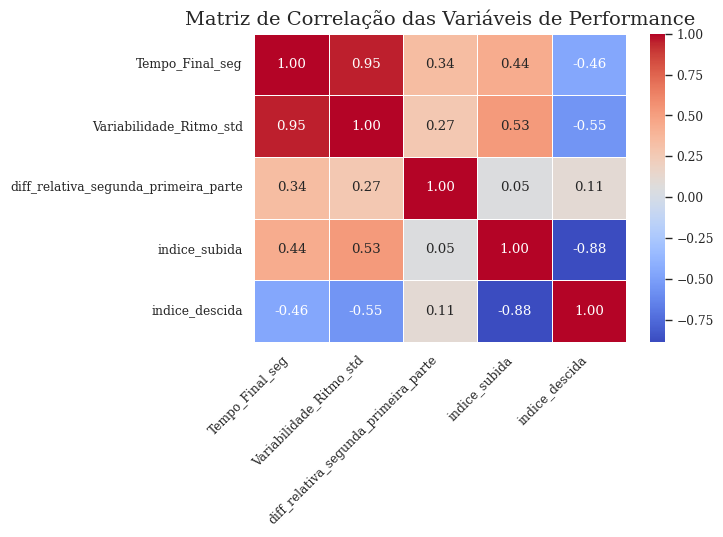

In [ ]:
# 1.4. Visualização gráfica da matriz de correlação (equivalente ao corrplot)
plt.figure(figsize=(6, 4))
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação das Variáveis de Performance", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()

A análise exploratória inicial, por meio da matriz de correlação de Pearson, revelou associações lineares significativas entre as variáveis de performance dos corredores. Os principais achados foram:

- Forte Correlação Positiva:

Tempo_Final_seg e Variabilidade_Ritmo_std (r≈0.95): Indica que corredores mais lentos (maior tempo final) também apresentam uma maior oscilação em seu ritmo ao longo da prova. Isso sugere que a consistência do ritmo é um fator chave para um bom desempenho.

- Correlações Moderadas:

Tempo_Final_seg tem correlação positiva moderada com indice_subida (r≈0.44) e negativa moderada com indice_descida (r≈−0.46). Isso significa que corredores mais lentos tendem a ser desproporcionalmente mais penalizados em subidas e a aproveitar menos as descidas.

- Identificação de Multicolinearidade:

A observação mais crítica foi a forte correlação negativa entre indice_subida e indice_descida (r=−0.884). Este valor indica um alto grau de multicolinearidade. Estatisticamente, isso implica que as duas variáveis são amplamente redundantes, pois uma pode ser linearmente prevista a partir da outra.

### Trasformação Ortogonal

**Justificativa da Transformação de Variáveis**

A presença de multicolinearidade pode prejudicar a performance e a interpretabilidade de modelos estatísticos, especialmente algoritmos baseados em distância como o K-Means. Para mitigar este efeito, optou-se por uma transformação ortogonal sobre as variáveis indice_subida (S) e indice_descida (D). Esta abordagem, análoga a uma Análise de Componentes Principais (PCA) simplificada, gera um novo conjunto de variáveis não correlacionadas, preservando a informação original.

In [ ]:
# Transformação Ortogonal para Tratar a Multicolinearidade ---

# Criar as novas variáveis a partir de 'indice_subida' (S) e 'indice_descida' (D)
S = df_segundos["indice_subida"]
D = df_segundos["indice_descida"]

# A transformação cria duas novas variáveis independentes
df_segundos["indice_especializacao"] = (D - S) / np.sqrt(2)
df_segundos["indice_capacidade_geral"] = (D + S) / np.sqrt(2)

A transformação resultou em duas novas features independentes com interpretação direta sobre o perfil do corredor em relação ao terreno:

- **indice_capacidade_geral:**

> **O que mede**: A performance combinada do atleta em terrenos com variação de altimetria. Captura a capacidade do corredor de lidar tanto com subidas quanto com descidas.

**Interpretação:**

> **Valores altos**: Indicam um corredor "completo" ou "generalista", que é eficiente tanto para subir quanto para descer.

> **Valores baixos**: Sugerem um corredor com dificuldades gerais em terrenos variados, sendo muito penalizado em subidas e não conseguindo compensar em descidas.

- **indice_especializacao:**

> **O que mede**: O viés de performance do atleta para um tipo específico de terreno.

**Interpretação:**

> **Valores positivos** (próximos de 1 ou mais): Indicam um corredor "especialista em descidas" (downhill specialist), que é muito mais rápido em descidas do que lento em subidas.

> **Valores negativos** (próximos de -1 ou menos): Indicam um "especialista em subidas" (climber), que, embora perca tempo subindo, perde proporcionalmente menos tempo do que ganha nas descidas.

> **Valores próximos de zero**: Caracterizam um corredor "equilibrado", cujo desempenho em subidas e descidas é simétrico.

In [ ]:
#  Selecionar as variáveis originais e as transformadas
vars_verificacao = [
    "Tempo_Final_seg",
    "indice_subida",
    "indice_descida",
    "indice_capacidade_geral",
    "indice_especializacao",
]

# 3.2. Calcular e imprimir a nova matriz de correlação
cor_matrix_transformada = df_segundos[vars_verificacao].corr()
print("--- Matriz de Correlação Após a Transformação ---")
print(round(cor_matrix_transformada, 3))
print("\n")

# 3.3. Verificar especificamente a correlação entre os novos índices
cor_novos_indices = df_segundos["indice_capacidade_geral"].corr(
    df_segundos["indice_especializacao"]
)
print(
    f"Correlação entre 'indice_capacidade_geral' e 'indice_especializacao': {cor_novos_indices:.7f}"
)

--- Matriz de Correlação Após a Transformação ---
                         Tempo_Final_seg  indice_subida  indice_descida  indice_capacidade_geral  indice_especializacao
Tempo_Final_seg                    1.000          0.439          -0.457                   -0.014                 -0.462
indice_subida                      0.439          1.000          -0.884                    0.292                 -0.971
indice_descida                    -0.457         -0.884           1.000                    0.189                  0.970
indice_capacidade_geral           -0.014          0.292           0.189                    1.000                 -0.057
indice_especializacao             -0.462         -0.971           0.970                   -0.057                  1.000


Correlação entre 'indice_capacidade_geral' e 'indice_especializacao': -0.0565072


**Validação da Técnica**

A eficácia da transformação foi confirmada ao se calcular a correlação entre as novas variáveis, que resultou em r≈−0.057. Este valor, muito próximo de zero, valida a ortogonalidade dos novos eixos e confirma que o problema da multicolinearidade foi efetivamente solucionado. As variáveis indice_capacidade_geral e indice_especializacao estão, portanto, aptas para serem utilizadas em etapas subsequentes de modelagem, como a análise de clusters.

## Clusterização

In [ ]:
features_para_cluster = [
    "diff_relativa_segunda_primeira_parte",
    "Variabilidade_Ritmo_std",
    "indice_capacidade_geral",
    "indice_especializacao",
]

# Criando um novo DataFrame apenas com as features selecionadas e sem dados faltantes
df_cluster = df_segundos[features_para_cluster].dropna()

# Guardando os nomes dos atletas (o índice) para usarmos depois
nomes_atletas = df_cluster.index

# --- 2. ESCALONAMENTO DOS DADOS (PASSO OBRIGATÓRIO) ---
# Todas as variáveis precisam estar na mesma escala de importância
scaler = StandardScaler()
dados_escalonados = scaler.fit_transform(df_cluster)

print("Dados prontos e escalonados! Próximo passo: encontrar o número de clusters.")

Dados prontos e escalonados! Próximo passo: encontrar o número de clusters.


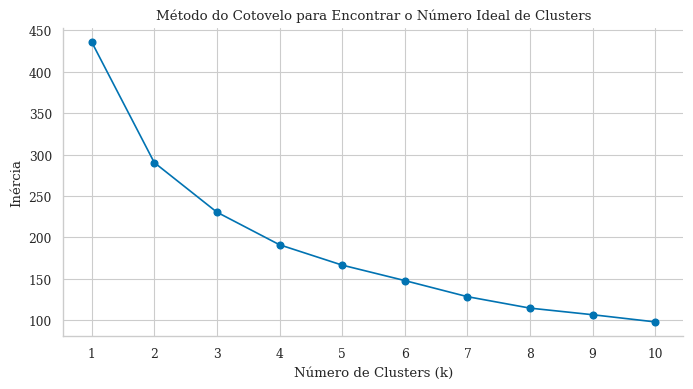

In [17]:
# --- 3. MÉTODO DO COTOVELO ---
inercia = []
range_clusters = range(1, 11)  # Vamos testar de 1 a 10 clusters

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(dados_escalonados)
    inercia.append(kmeans.inertia_)

# Plotando o gráfico do cotovelo
plt.figure(figsize=(8, 4))
plt.plot(range_clusters, inercia, marker="o")
plt.title("Método do Cotovelo para Encontrar o Número Ideal de Clusters")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inércia")
plt.xticks(range_clusters)
plt.grid(True)
plt.show()

Iniciando a Análise de Silhueta para encontrar o k ideal...
Para k = 2, a pontuação de silhueta média é: 0.3344
Para k = 3, a pontuação de silhueta média é: 0.3410
Para k = 4, a pontuação de silhueta média é: 0.3100
Para k = 5, a pontuação de silhueta média é: 0.2615
Para k = 6, a pontuação de silhueta média é: 0.2587
Para k = 7, a pontuação de silhueta média é: 0.2436
Para k = 8, a pontuação de silhueta média é: 0.2838
Para k = 9, a pontuação de silhueta média é: 0.2736
Para k = 10, a pontuação de silhueta média é: 0.2628
--------------------------------------------------
Análise concluída. O melhor valor de k é 3 com uma pontuação de 0.3410.
--------------------------------------------------


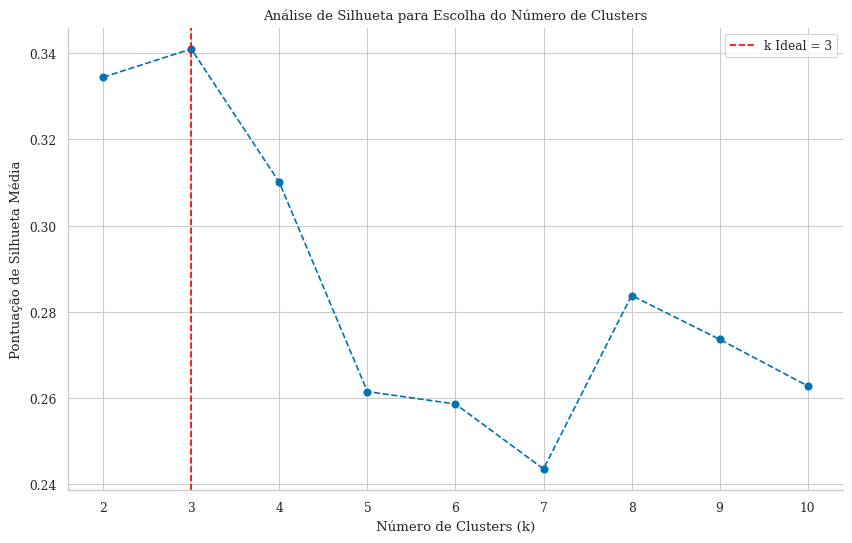

In [18]:
from sklearn.metrics import silhouette_score

# 1. Definir o intervalo de clusters que queremos testar
intervalo_k = range(2, 11)  # Testaremos de 2 a 10 clusters
pontuacoes_silhueta = []

print("Iniciando a Análise de Silhueta para encontrar o k ideal...")

# 2. Loop para testar cada valor de k
for k in intervalo_k:
    # Criar e treinar o modelo K-Means para o k atual
    # n_init='auto' é a configuração padrão recomendada
    # random_state=42 garante que os resultados sejam sempre os mesmos
    kmeans_model = KMeans(n_clusters=k, n_init="auto", random_state=42)
    kmeans_model.fit(dados_escalonados)

    # Obter os rótulos de cluster para cada ponto de dado
    labels = kmeans_model.labels_

    # Calcular a pontuação de silhueta média e armazená-la
    pontuacao = silhouette_score(dados_escalonados, labels)
    pontuacoes_silhueta.append(pontuacao)

    print(f"Para k = {k}, a pontuação de silhueta média é: {pontuacao:.4f}")

# 3. Encontrar o valor de k que resultou na maior pontuação
k_ideal = intervalo_k[np.argmax(pontuacoes_silhueta)]
maior_pontuacao = max(pontuacoes_silhueta)

print("-" * 50)
print(
    f"Análise concluída. O melhor valor de k é {k_ideal} com uma pontuação de {maior_pontuacao:.4f}."
)
print("-" * 50)

# 4. Plotar o gráfico com os resultados
plt.figure(figsize=(10, 6))
plt.plot(intervalo_k, pontuacoes_silhueta, marker="o", linestyle="--")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Pontuação de Silhueta Média")
plt.title("Análise de Silhueta para Escolha do Número de Clusters")
plt.xticks(intervalo_k)
plt.grid(True)

# Adicionar uma linha vertical para destacar o k ideal no gráfico
plt.axvline(x=k_ideal, color="red", linestyle="--", label=f"k Ideal = {k_ideal}")
plt.legend()

plt.show()

# --------------------------------------------------------------------
# FIM DO CÓDIGO
# --------------------------------------------------------------------

Pelo método do cotovelo e da silhueta vamos definir 3 clusters

In [54]:
# --- 4. RODANDO O MODELO FINAL ---
# Supondo que o número ideal de clusters que encontramos foi 3
numero_ideal_clusters = 3

kmeans = KMeans(n_clusters=numero_ideal_clusters, random_state=42, n_init=10)
kmeans_final = kmeans.fit(dados_escalonados)

# Adicionando os rótulos dos clusters de volta ao nosso DataFrame
df_cluster["cluster"] = kmeans_final.labels_


# --- 5. INTERPRETAÇÃO DOS CLUSTERS (PROFILING) ---
# Este é o passo mais importante: entender o que cada cluster significa.
# Vamos agrupar por cluster e calcular a média de cada variável.
perfis_clusters = df_cluster.groupby("cluster").mean().round(3)

print("--- Perfis dos Clusters Encontrados ---")
print(perfis_clusters)

--- Perfis dos Clusters Encontrados ---
         diff_relativa_segunda_primeira_parte  Variabilidade_Ritmo_std  indice_capacidade_geral  indice_especializacao
cluster                                                                                                               
0                                      -0.174                  653.023                    0.018                 -0.314
1                                      -0.204                  286.063                    0.035                 -0.228
2                                      -0.070                  573.035                    0.054                 -0.328


In [55]:
df_segundos["cluster"] = df_cluster["cluster"]


# --- Parte 2: Sumarização e Análise dos Perfis dos Clusters ---

# 2.1. Criar a tabela de resumo (equivalente ao group_by |> summarise)
# Usamos o dataframe com os valores originais (não escalados) para a interpretação
cluster_summary = (
    df_segundos.dropna(subset=["cluster"])
    .groupby("cluster")
    .agg(
        N=("cluster", "size"),
        Proporcao=(
            "cluster",
            lambda x: round(
                100 * x.size / len(df_segundos.dropna(subset=["cluster"])), 1
            ),
        ),
        Variabilidade_Media=("Variabilidade_Ritmo_std", lambda x: round(x.mean(), 2)),
        Estrategia_Media=(
            "diff_relativa_segunda_primeira_parte",
            lambda x: round(x.mean(), 3),
        ),
        Capacidade_Geral_Media=(
            "indice_capacidade_geral",
            lambda x: round(x.mean(), 3),
        ),
        Especializacao_Media=("indice_especializacao", lambda x: round(x.mean(), 3)),
        Tempo_Final_seg=("Tempo_Final_seg", lambda x: round(x.mean() / 60, 1)),
    )
    .sort_values(by="Tempo_Final_seg")
    .reset_index()
)

print("--- Resumo por Cluster ---")
print(cluster_summary)
print("\n")

--- Resumo por Cluster ---
   cluster   N  Proporcao  Variabilidade_Media  Estrategia_Media  Capacidade_Geral_Media  Especializacao_Media  Tempo_Final_seg
0        1  63       57.8               286.06            -0.204                   0.035                -0.228            342.8
1        2  27       24.8               573.03            -0.070                   0.054                -0.328            509.9
2        0  19       17.4               653.02            -0.174                   0.018                -0.314            559.6




**Perfis de Corredores: Uma Análise de Clusters**
A aplicação do algoritmo K-Means com k=3 permitiu a segmentação da amostra em três grupos distintos e interpretáveis, ordenados por desempenho:

**Cluster 1: Os Elite (57.8% da amostra)**

- Desempenho: Elite do grupo, com o menor tempo médio (342.8 Seg).

- Consistência: Apresentam a menor variabilidade de ritmo (Variabilidade_Media = 286.06seg), indicando uma corrida muito consistente e controlada.

- Estratégia de Prova: Exibem a estratégia de negative split mais acentuada (Estrategia_Media = -0.204), o que significa que, em média, correm a segunda metade da prova mais rápido que a primeira. Esta é uma marca de corredores experientes e bem preparados.

- Perfil de Terreno: São corredores "generalistas", com boa capacidade em terrenos variados (Capacidade_Geral_Media = 0.035) e um perfil equilibrado entre subidas e descidas (Especializacao_Media = -0.228).

**Cluster 2: Os Intermediários (24.8% da amostra)**

- Desempenho: Grupo intermediário em termos de tempo (509.9 seg).

- Consistência: Quase o dobro da variabilidade do Cluster 1 (Variabilidade_Media = 573.03 seg), sugerindo uma maior dificuldade em manter um ritmo constante.

- Estratégia de Prova: Possuem uma estratégia de ritmo praticamente neutra (Estrategia_Media = -0.070), correndo a primeira e a segunda metade em velocidades muito parecidas.

- Perfil de Terreno: Apresentam a melhor capacidade geral para lidar com terrenos variados (Capacidade_Geral_Media = 0.054) e são os mais "especialistas em subidas" do grupo (Especializacao_Media = -0.328). Podem não ser os mais rápidos no geral, mas são os mais eficientes em percursos com altimetria.

**Cluster 0: Os Amadores (17.4% da amostra)**

- Desempenho: Grupo com maior tempo de prova (559.6 seg).

- Consistência: Exibem a maior variabilidade de ritmo (Variabilidade_Media = 653.02  seg), o que caracteriza uma corrida menos planejada e com grandes quebras de ritmo.

- Estratégia de Prova: Embora também apresentem um negative split (Estrategia_Media = -0.174), isso pode ser um artefato de um início de prova excessivamente lento, e não necessariamente uma estratégia controlada.

- Perfil de Terreno: Demonstram a menor capacidade geral em terrenos variados (Capacidade_Geral_Media = 0.018), indicando que são os mais afetados pela altimetria do percurso.

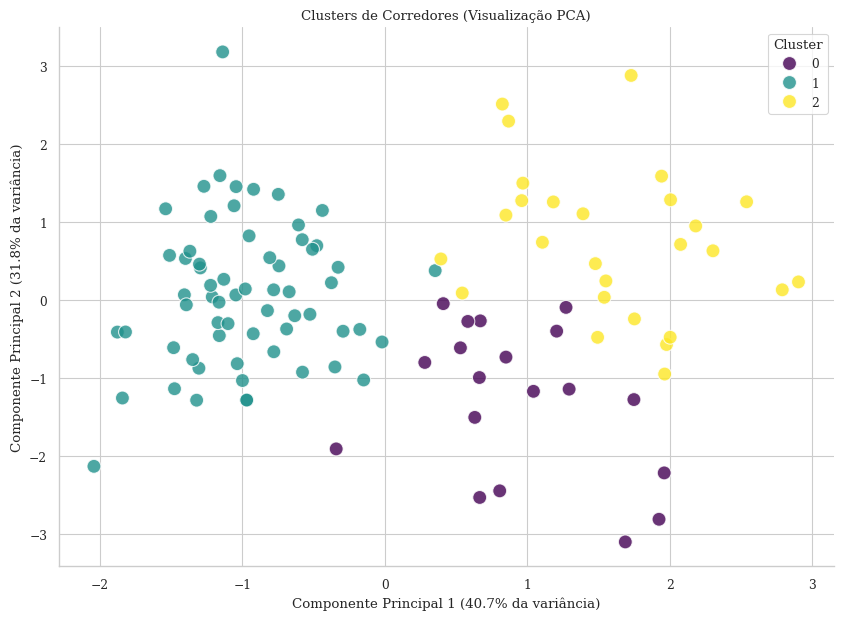

In [ ]:
pca = PCA(n_components=2)
principais_componentes = pca.fit_transform(dados_escalonados)
df_pca = pd.DataFrame(data=principais_componentes, columns=["PC1", "PC2"])
df_pca["cluster"] = kmeans_final.labels_

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x="PC1", y="PC2", hue="cluster", data=df_pca, palette="viridis", s=100, alpha=0.8
)
plt.title("Clusters de Corredores (Visualização PCA)")
plt.xlabel(
    f"Componente Principal 1 ({pca.explained_variance_ratio_[0] * 100:.1f}% da variância)"
)
plt.ylabel(
    f"Componente Principal 2 ({pca.explained_variance_ratio_[1] * 100:.1f}% da variância)"
)
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

**Visualização PCA**

Reduz a dimensionalidade das 4 variáveis usadas para apenas 2 "Componentes Principais", que são combinações lineares das originais e que capturam o máximo de variância possível (no seu caso, 72%). Isso permite visualizar os clusters num gráfico 2D. O objetivo é ver o quão "separados" e "coesos" os grupos são.

C:\Users\Home\AppData\Local\Temp\ipykernel_22460\3663038824.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='cluster', y='Valor', col='Variavel', data=df_melted,


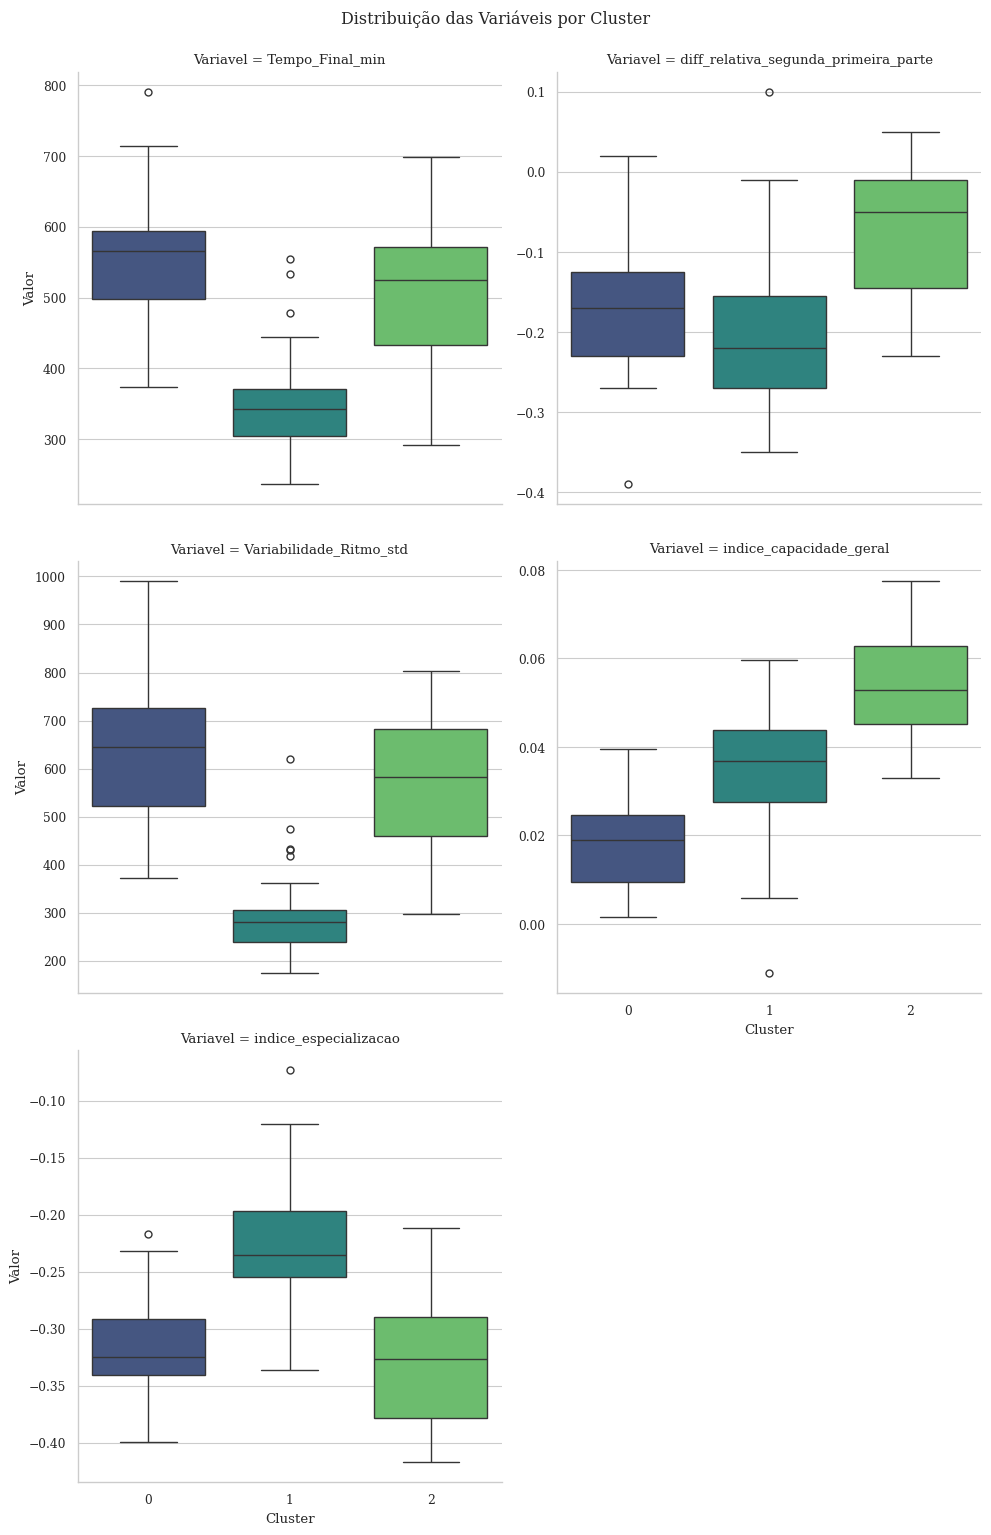

In [ ]:
df_boxplot = df_segundos.dropna(subset=["cluster"]).copy()
df_boxplot["Tempo_Final_min"] = df_boxplot["Tempo_Final_seg"] / 60
vars_para_boxplot = ["cluster", "Tempo_Final_min"] + features_para_cluster
df_melted = df_boxplot[vars_para_boxplot].melt(
    id_vars="cluster", var_name="Variavel", value_name="Valor"
)

# Criar o gráfico
g = sns.catplot(
    x="cluster",
    y="Valor",
    col="Variavel",
    data=df_melted,
    kind="box",
    col_wrap=2,
    palette="viridis",
    sharey=False,
)
g.fig.suptitle("Distribuição das Variáveis por Cluster", y=1.02)
g.set_axis_labels("Cluster", "Valor")
plt.show()

### Comparação entre os clusters

Após a segmentação dos corredores em três clusters, foi conduzida uma Análise de Variância (ANOVA) para validar estatisticamente se os perfis identificados diferem significativamente em relação a variáveis-chave de desempenho. O objetivo do teste é verificar se a variação observada nas médias das variáveis entre os clusters é significativamente maior do que a variação dentro de cada cluster.

> **Pergunta:** "Após o agrupamento, existe uma diferença estatisticamente significativa no tempo de prova entre as diferentes faixas de peso?"

- **Teste Proposto:** ANOVA ou seu equivalente não paramétrico (Kruskal-Wallis), a ser decidido após a verificação dos pressupostos nos novos grupos de dados.

**Passos Detalhados:**

- **Hipóteses:**
> **H₀:** As médias (ou distribuições) das variáveis de prova são iguais para todos os clusters.

> **H₁:** Pelo menos uma das médias (ou distribuições) das Variaveis de prova é diferente das demais.

- **Nível de Significância:** α = 0.05.

**Pressupostos**
- Testar a Homogeneidade de Variâncias (Levene)
- Testar a Normalidade dos Resíduos (Shapiro-Wilk)

#### Testar a Homogeneidade de Variâncias (Levene)

> H₀: As variâncias são iguais entre os grupos

Se p-valor < 0.05, o pressuposto é violado

In [ ]:
df_with_clusters = df_segundos.dropna(subset=["cluster"]).copy()
df_with_clusters["cluster"] = df_with_clusters["cluster"].astype(int)
df_with_clusters.head(2)

,Unnamed: 0,sexo,faixa_etaria,peso,Tempo_Final_seg,Ritmo_Medio_seg,Variabilidade_Ritmo_std,Variabilidade_Ritmo_min_std,Ritmo_Medio_Primeira_Metade,Ritmo_Medio_Segunda_Metade,Tempo_Total_Primeira_Metade,Tempo_Total_Segunda_Metade,Diferenca_Media_Seg_Menos_Pri,Diferenca_total_Seg_Menos_Pri,diff_relativa_segunda_primeira_parte,Ritmo_Medio_Trecho_0-5_km,Ritmo_Medio_Trecho_5-10_km,Ritmo_Medio_Trecho_10-15_km,Ritmo_Medio_Trecho_15-20_km,Ritmo_Medio_Trecho_20-25_km,Ritmo_Medio_Trecho_25-30_km,Ritmo_Medio_Trecho_30-35_km,Ritmo_Medio_Trecho_35-40_km,Tempo_Total_Trecho_0-5_km,Tempo_Total_Trecho_5-10_km,Tempo_Total_Trecho_10-15_km,Tempo_Total_Trecho_15-20_km,Tempo_Total_Trecho_20-25_km,Tempo_Total_Trecho_25-30_km,Tempo_Total_Trecho_30-35_km,Tempo_Total_Trecho_35-40_km,Ritmo_Medio_DESCIDA,Ritmo_Medio_MISTO,Ritmo_Medio_PLANO,Ritmo_Medio_SUBIDA,Tempo_Total_DESCIDA,Tempo_Total_MISTO,Tempo_Total_PLANO,Tempo_Total_SUBIDA,indice_subida,indice_descida_vs_subida,indice_descida,indice_especializacao,indice_capacidade_geral,cluster
Nome Atleta,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ALFREDO GUIMARAES,0,Homens,45 a 54,75 a 84 kg,21774,604.833333,290.291331,4.838189,667.777778,541.888889,12020,9754,-2.10,-37.76,-0.19,419.0,600.0,634.8,983.0,495.4,539.8,611.4,357.0,2095.0,3000.0,3174.0,4915.0,2477.0,2699.0,3057.0,357.0,522.933333,474.5,335.5,724.117647,7844,949,671,12310,0.197218,-0.277834,-0.135409,-0.235203,0.043706,1
Albert Melo,1,Homens,25 a 34,75 a 84 kg,31986,888.500000,417.596832,6.959947,942.944444,834.055556,16973,15013,-1.82,-32.66,-0.12,599.8,898.8,825.4,1442.8,737.4,825.0,927.8,701.0,2999.0,4494.0,4127.0,7214.0,3687.0,4125.0,4639.0,701.0,789.933333,742.0,535.0,1034.294118,11849,1484,1070,17583,0.164090,-0.236259,-0.110936,-0.194473,0.037586,1


In [ ]:
# Lista de todas as variáveis de interesse
lista_variaveis = [
    "Variabilidade_Ritmo_std",
    "indice_capacidade_geral",
    "diff_relativa_segunda_primeira_parte",
    "indice_especializacao",
    "Tempo_Final_seg",
]

print(
    "--- Verificação do Pressuposto de Homogeneidade de Variâncias (Teste de Levene) ---"
)
print("H₀: As variâncias são iguais entre os grupos.")
print("Se p-valor < 0.05, o pressuposto é violado.\n")

for variavel in lista_variaveis:
    levene_test = pg.homoscedasticity(
        data=df_with_clusters, dv=variavel, group="cluster", method="levene"
    )
    p_valor = levene_test["pval"].iloc[0]

    print(f"Variável: {variavel}")
    print(f"  - p-valor do Teste de Levene: {p_valor:.4f}")
    if p_valor < 0.05:
        print("  - Resultado: VIOLADO (as variâncias são diferentes).\n")
    else:
        print("  - Resultado: ATENDIDO (as variâncias são homogêneas).\n")

--- Verificação do Pressuposto de Homogeneidade de Variâncias (Teste de Levene) ---
H₀: As variâncias são iguais entre os grupos.
Se p-valor < 0.05, o pressuposto é violado.

Variável: Variabilidade_Ritmo_std
  - p-valor do Teste de Levene: 0.0000
  - Resultado: VIOLADO (as variâncias são diferentes).

Variável: indice_capacidade_geral
  - p-valor do Teste de Levene: 0.6470
  - Resultado: ATENDIDO (as variâncias são homogêneas).

Variável: diff_relativa_segunda_primeira_parte
  - p-valor do Teste de Levene: 0.9124
  - Resultado: ATENDIDO (as variâncias são homogêneas).

Variável: indice_especializacao
  - p-valor do Teste de Levene: 0.1544
  - Resultado: ATENDIDO (as variâncias são homogêneas).

Variável: Tempo_Final_seg
  - p-valor do Teste de Levene: 0.0226
  - Resultado: VIOLADO (as variâncias são diferentes).



#### Testar a Normalidade dos Resíduos (Shapiro-Wilk)

In [ ]:
# Lista de todas as variáveis de interesse
lista_variaveis = [
    "Variabilidade_Ritmo_std",
    "indice_capacidade_geral",
    "diff_relativa_segunda_primeira_parte",
    "indice_especializacao",
    "Tempo_Final_seg",
]

print(
    "\n--- Verificação do Pressuposto de Normalidade dos Resíduos (Teste de Shapiro-Wilk) ---"
)
print("H₀: Os resíduos são normalmente distribuídos.")
print("Se p-valor < 0.05, o pressuposto é violado.\n")

for variavel in lista_variaveis:
    # Usamos aspas na fórmula para lidar com nomes de variáveis com caracteres especiais
    modelo = ols(f'Q("{variavel}") ~ C(cluster)', data=df_with_clusters).fit()
    residuos = modelo.resid

    shapiro_test = pg.normality(residuos, method="shapiro")
    p_valor = shapiro_test["pval"].iloc[0]

    print(f"Variável: {variavel}")
    print(f"  - p-valor do Teste de Shapiro-Wilk: {p_valor:.4f}")
    if p_valor < 0.05:
        print("  - Resultado: VIOLADO (os resíduos não são normais).\n")
    else:
        print("  - Resultado: ATENDIDO (os resíduos são normais).\n")


--- Verificação do Pressuposto de Normalidade dos Resíduos (Teste de Shapiro-Wilk) ---
H₀: Os resíduos são normalmente distribuídos.
Se p-valor < 0.05, o pressuposto é violado.

Variável: Variabilidade_Ritmo_std
  - p-valor do Teste de Shapiro-Wilk: 0.0032
  - Resultado: VIOLADO (os resíduos não são normais).

Variável: indice_capacidade_geral
  - p-valor do Teste de Shapiro-Wilk: 0.1054
  - Resultado: ATENDIDO (os resíduos são normais).

Variável: diff_relativa_segunda_primeira_parte
  - p-valor do Teste de Shapiro-Wilk: 0.0696
  - Resultado: ATENDIDO (os resíduos são normais).

Variável: indice_especializacao
  - p-valor do Teste de Shapiro-Wilk: 0.2562
  - Resultado: ATENDIDO (os resíduos são normais).

Variável: Tempo_Final_seg
  - p-valor do Teste de Shapiro-Wilk: 0.0638
  - Resultado: ATENDIDO (os resíduos são normais).



#### Comparando - Variabilidade_Ritmo_std

Justificativa Metodológica: A análise dos pressupostos revelou que os resíduos não seguem uma distribuição normal (Shapiro-Wilk p = 0.0032). Conforme a recomendação, quando a normalidade é violada, a abordagem estatística mais segura e apropriada é a não-paramétrica. Portanto, utilizaremos o Teste de Kruskal-Wallis para a comparação geral e o Teste de Dunn (com correção de Bonferroni) para as comparações par a par (post-hoc).

In [ ]:
print("--- Análise Não-Paramétrica para: Variabilidade_Ritmo_std ---")

# Teste Omnibus Não-Paramétrico (Kruskal-Wallis)
print("\nResultado do Teste de Kruskal-Wallis:")
kruskal_result = pg.kruskal(
    data=df_with_clusters, dv="Variabilidade_Ritmo_std", between="cluster"
)
print(kruskal_result)

# Teste Post-Hoc Não-Paramétrico (Dunn-Bonferroni)
print("\nResultado do Teste Post-Hoc (Dunn com correção de Bonferroni):")
dunn_result = sp.posthoc_dunn(
    df_with_clusters,
    val_col="Variabilidade_Ritmo_std",
    group_col="cluster",
    p_adjust="bonferroni",
)
print(dunn_result)

--- Análise Não-Paramétrica para: Variabilidade_Ritmo_std ---

Resultado do Teste de Kruskal-Wallis:
          Source  ddof1          H         p-unc
Kruskal  cluster      2  72.377114  1.920921e-16

Resultado do Teste Post-Hoc (Dunn com correção de Bonferroni):
              0             1             2
0  1.000000e+00  4.485165e-11  1.000000e+00
1  4.485165e-11  1.000000e+00  3.698186e-11
2  1.000000e+00  3.698186e-11  1.000000e+00


#### Comparação - Tempo_Final_seg

Justificativa Metodológica: A análise dos pressupostos revelou que, embora os resíduos sejam normalmente distribuídos (Shapiro-Wilk p = 0.0638), o pressuposto de homogeneidade de variâncias foi violado (Levene p = 0.0226). Neste cenário, a abordagem paramétrica correta é a que não exige variâncias iguais. Portanto, utilizaremos a ANOVA de Welch para a comparação geral e o Teste de Games-Howell para o post-hoc.

In [ ]:
print("--- Análise Robusta para Variâncias Desiguais: Tempo_Final_seg ---")

# Teste Omnibus Robusto (ANOVA de Welch)
print("\nResultado da ANOVA de Welch:")
welch_aov = pg.welch_anova(
    data=df_with_clusters, dv="Tempo_Final_seg", between="cluster"
)
print(welch_aov)

# Teste Post-Hoc Robusto (Games-Howell)
print("\nResultado do Teste Post-Hoc (Games-Howell):")
games_howell_result = pg.pairwise_gameshowell(
    data=df_with_clusters, dv="Tempo_Final_seg", between="cluster"
)
print(games_howell_result)

--- Análise Robusta para Variâncias Desiguais: Tempo_Final_seg ---

Resultado da ANOVA de Welch:
    Source  ddof1      ddof2          F         p-unc       np2
0  cluster      2  35.761437  64.419634  1.395676e-12  0.590185

Resultado do Teste Post-Hoc (Games-Howell):
   A  B       mean(A)       mean(B)          diff           se         T         df          pval    hedges
0  0  1  33577.842105  20568.428571  13009.413534  1476.215427  8.812680  22.504632  2.772513e-08  2.899308
1  0  2  33577.842105  30596.925926   2980.916179  1767.929524  1.686106  37.038934  2.239216e-01  0.502794
2  1  2  20568.428571  30596.925926 -10028.497354  1189.573673 -8.430329  36.738814  1.223344e-09 -2.233268


#### Comparação - indice_capacidade_geral
Justificativa Metodológica: A análise dos pressupostos revelou que tanto a normalidade dos resíduos (Shapiro-Wilk p = 0.1054) quanto a homogeneidade de variâncias (Levene p = 0.6470) foram atendidas. Este é o cenário ideal para a aplicação da abordagem paramétrica padrão. Portanto, utilizaremos a ANOVA padrão e o Teste de Tukey HSD como post-hoc.

In [ ]:
print("--- Análise Paramétrica Padrão para: indice_capacidade_geral ---")

# Teste Omnibus Padrão (ANOVA)
print("\nResultado da ANOVA Padrão:")
aov_result = pg.anova(
    data=df_with_clusters, dv="indice_capacidade_geral", between="cluster"
)
print(aov_result)

# Teste Post-Hoc Padrão (Tukey HSD)
print("\nResultado do Teste Post-Hoc (Tukey HSD):")
tukey_result = pg.pairwise_tukey(
    data=df_with_clusters, dv="indice_capacidade_geral", between="cluster"
)
print(tukey_result)

--- Análise Paramétrica Padrão para: indice_capacidade_geral ---

Resultado da ANOVA Padrão:
    Source  ddof1  ddof2          F         p-unc       np2
0  cluster      2    106  43.964306  1.247932e-14  0.453407

Resultado do Teste Post-Hoc (Tukey HSD):
   A  B   mean(A)   mean(B)      diff        se         T       p-tukey    hedges
0  0  1  0.018019  0.035256 -0.017238  0.003369 -5.116541  4.154001e-06 -1.301332
1  0  2  0.018019  0.053706 -0.035687  0.003854 -9.258577  6.084022e-14 -3.047176
2  1  2  0.035256  0.053706 -0.018449  0.002961 -6.231072  2.859482e-08 -1.377278


#### Comparação - diff_relativa_segunda_primeira_parte
Justificativa Metodológica: A análise dos pressupostos revelou que tanto a normalidade dos resíduos (Shapiro-Wilk p = 0.0696) quanto a homogeneidade de variâncias (Levene p = 0.9124) foram atendidas. Portanto, utilizaremos a ANOVA padrão e o Teste de Tukey HSD como post-hoc.

In [ ]:
print("--- Análise Paramétrica Padrão para: diff_relativa_segunda_primeira_parte ---")

# Teste Omnibus Padrão (ANOVA)
print("\nResultado da ANOVA Padrão:")
aov_result = pg.anova(
    data=df_with_clusters, dv="diff_relativa_segunda_primeira_parte", between="cluster"
)
print(aov_result)

# Teste Post-Hoc Padrão (Tukey HSD)
print("\nResultado do Teste Post-Hoc (Tukey HSD):")
tukey_result = pg.pairwise_tukey(
    data=df_with_clusters, dv="diff_relativa_segunda_primeira_parte", between="cluster"
)
print(tukey_result)

--- Análise Paramétrica Padrão para: diff_relativa_segunda_primeira_parte ---

Resultado da ANOVA Padrão:
    Source  ddof1  ddof2         F         p-unc       np2
0  cluster      2    106  23.16591  4.500983e-09  0.304151

Resultado do Teste Post-Hoc (Tukey HSD):
   A  B   mean(A)   mean(B)      diff        se         T       p-tukey    hedges
0  0  1 -0.174211 -0.204286  0.030075  0.022439  1.340307  3.761860e-01  0.342756
1  0  2 -0.174211 -0.070370 -0.103840  0.025672 -4.044835  2.917012e-04 -1.182509
2  1  2 -0.204286 -0.070370 -0.133915  0.019720 -6.790737  2.002164e-09 -1.574139


#### Comparação - indice_especializacao
Justificativa Metodológica: A análise dos pressupostos revelou que tanto a normalidade dos resíduos (Shapiro-Wilk p = 0.2562) quanto a homogeneidade de variâncias (Levene p = 0.1544) foram atendidas. Portanto, utilizaremos a ANOVA padrão e o Teste de Tukey HSD como post-hoc.

In [ ]:
print("--- Análise Paramétrica Padrão para: indice_especializacao ---")

# Teste Omnibus Padrão (ANOVA)
print("\nResultado da ANOVA Padrão:")
aov_result = pg.anova(
    data=df_with_clusters, dv="indice_especializacao", between="cluster"
)
print(aov_result)

# Teste Post-Hoc Padrão (Tukey HSD)
print("\nResultado do Teste Post-Hoc (Tukey HSD):")
tukey_result = pg.pairwise_tukey(
    data=df_with_clusters, dv="indice_especializacao", between="cluster"
)
print(tukey_result)

--- Análise Paramétrica Padrão para: indice_especializacao ---

Resultado da ANOVA Padrão:
    Source  ddof1  ddof2          F         p-unc       np2
0  cluster      2    106  43.928819  1.272379e-14  0.453207

Resultado do Teste Post-Hoc (Tukey HSD):
   A  B   mean(A)   mean(B)      diff        se         T       p-tukey    hedges
0  0  1 -0.313869 -0.228418 -0.085451  0.013569 -6.297768  2.092948e-08 -1.732142
1  0  2 -0.313869 -0.328072  0.014203  0.015524  0.914942  6.320915e-01  0.245503
2  1  2 -0.228418 -0.328072  0.099655  0.011925  8.357100  8.651968e-13  1.906165
